# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
sns.set()


# Preprocessing

## Import the data & Preview The Data

Importing the data and displaying the first few rows to check an initial overview of the data structure

In [2]:
raw_data = pd.read_csv('fitness_dataset.csv')
print('Data Shape =',raw_data.shape)
raw_data.head()         ### Preview of the Dataset

Data Shape = (2000, 11)


,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
0,56,152,65,69.6,117.0,NaN,2.37,3.97,no,F,1
1,69,186,95,60.8,114.8,7.5,8.77,3.19,0,F,1
2,46,192,103,61.4,116.4,NaN,8.20,2.03,0,F,0
3,32,189,83,60.2,130.1,7.0,6.18,3.68,0,M,1
4,60,175,99,58.1,115.8,8.0,9.95,4.83,yes,F,1


## Breakdown The Dataset
Below is a statistical summary of all columns in the dataset

In [3]:
raw_data.describe(include='all')

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,1840.000000,2000.000000,2000.000000,2000,2000,2000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,F,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,711,1030,NaN
mean,49.114000,174.53300,83.540500,70.288600,119.908850,7.513315,5.035140,2.999040,NaN,NaN,0.399500
std,17.926564,14.37175,25.852534,11.846339,14.578032,1.502031,2.864156,1.136383,NaN,NaN,0.489918
min,18.000000,150.00000,30.000000,45.000000,90.000000,4.000000,0.000000,1.000000,NaN,NaN,0.000000
25%,34.000000,162.00000,64.000000,62.100000,109.700000,6.500000,2.547500,2.037500,NaN,NaN,0.000000
50%,49.000000,174.00000,83.000000,70.250000,120.000000,7.500000,5.065000,2.980000,NaN,NaN,0.000000
75%,65.000000,187.00000,102.000000,78.425000,129.800000,8.600000,7.470000,3.950000,NaN,NaN,1.000000


There's 4 unique in "smokes" (yes, no, 0, 1). These values are inconsistent, so we need to do mapping on "smokes" in order to make the values into binary integer. Smoker : 1 and Non-smoker : 0.

The "gender" values are string, we also need to do mapping so the values turn into integer. Female : 1 and Male : 0.

## Mapping The Data

In [4]:
data1 = raw_data.copy()
# Smokes data Mapping (yes = 1, no = 0)
data1['smokes'] = data1['smokes'].astype(str).str.strip().str.lower()   #convert the data into string and lower case
data1['smokes'] = data1['smokes'].replace({'yes': 1, '1': 1, 'no': 0, '0': 0,})  #map the data
#data1['smokes'] = data1['smokes'].replace('nan', -1).astype(int)    #replace the nan values with -1 and convert to integer

# Gender data Mapping (F = 1, M = 0)
data1['gender'] = data1['gender'].map({'F' : 1, 'M' : 0})    #create dummy line

print('Smoke Unique :',data1['smokes'].unique())
print('Gender Unique :',data1['gender'].unique())
data1

Smoke Unique : [0 1]
Gender Unique : [1 0]


C:\Users\panat\AppData\Local\Temp\ipykernel_9272\1914658254.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data1['smokes'] = data1['smokes'].replace({'yes': 1, '1': 1, 'no': 0, '0': 0,})  #map the data


,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
0,56,152,65,69.6,117.0,NaN,2.37,3.97,0,1,1
1,69,186,95,60.8,114.8,7.5,8.77,3.19,0,1,1
2,46,192,103,61.4,116.4,NaN,8.20,2.03,0,1,0
3,32,189,83,60.2,130.1,7.0,6.18,3.68,0,0,1
4,60,175,99,58.1,115.8,8.0,9.95,4.83,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,52,173,98,60.7,106.1,NaN,1.54,3.25,1,0,1
1996,61,186,74,51.4,123.8,9.4,8.63,3.15,0,0,1
1997,77,198,89,76.7,103.6,8.3,1.98,3.36,1,0,0
1998,62,190,63,80.7,115.9,6.7,9.21,2.39,1,1,0


## Check the missing values

In [5]:
missing_data = data1.isnull().sum()
missing_percent = (data1.isnull().sum()/data1.isnull().count())*100
missing_table = pd.concat([missing_data, missing_percent], axis=1, keys=['Total Missing Values', 'Percent of Missing Values'])
missing_table = missing_table[missing_table['Total Missing Values'] > 0].sort_values('Percent of Missing Values', ascending=False)
missing_table

,Total Missing Values,Percent of Missing Values
sleep_hours,160,8.0


We get how many missing values are in the dataset. It turned out just "sleep_hours" his missing values which is only 8% of the dataset. Since this is below 10%, we can apply a simple imputation strategy. We chose median imputation because sleep data can contain outliers and the median is more robust than the mean in such cases (Little & Rubin, 2002; Allison, 2001).

## Filling the missing values

In [6]:
data1['sleep_hours'] = data1['sleep_hours'].fillna(data1['sleep_hours'].median())
data1

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
0,56,152,65,69.6,117.0,7.5,2.37,3.97,0,1,1
1,69,186,95,60.8,114.8,7.5,8.77,3.19,0,1,1
2,46,192,103,61.4,116.4,7.5,8.20,2.03,0,1,0
3,32,189,83,60.2,130.1,7.0,6.18,3.68,0,0,1
4,60,175,99,58.1,115.8,8.0,9.95,4.83,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,52,173,98,60.7,106.1,7.5,1.54,3.25,1,0,1
1996,61,186,74,51.4,123.8,9.4,8.63,3.15,0,0,1
1997,77,198,89,76.7,103.6,8.3,1.98,3.36,1,0,0
1998,62,190,63,80.7,115.9,6.7,9.21,2.39,1,1,0


## Check the missing values

In [7]:
missing_data = data1.isnull().sum()
missing_percent = (data1.isnull().sum()/data1.isnull().count())*100
missing_table = pd.concat([missing_data, missing_percent], axis=1, keys=['Total Missing Values', 'Percent of Missing Values'])
missing_table = missing_table[missing_table['Total Missing Values'] > 0].sort_values('Percent of Missing Values', ascending=False)
missing_table

,Total Missing Values,Percent of Missing Values


As our data is all set maybe we can check using plot to know how the data distributed, is there any error or inconsistent data

## Plotting the data

Text(0.5, 1.0, 'Activity Index (1-10)')

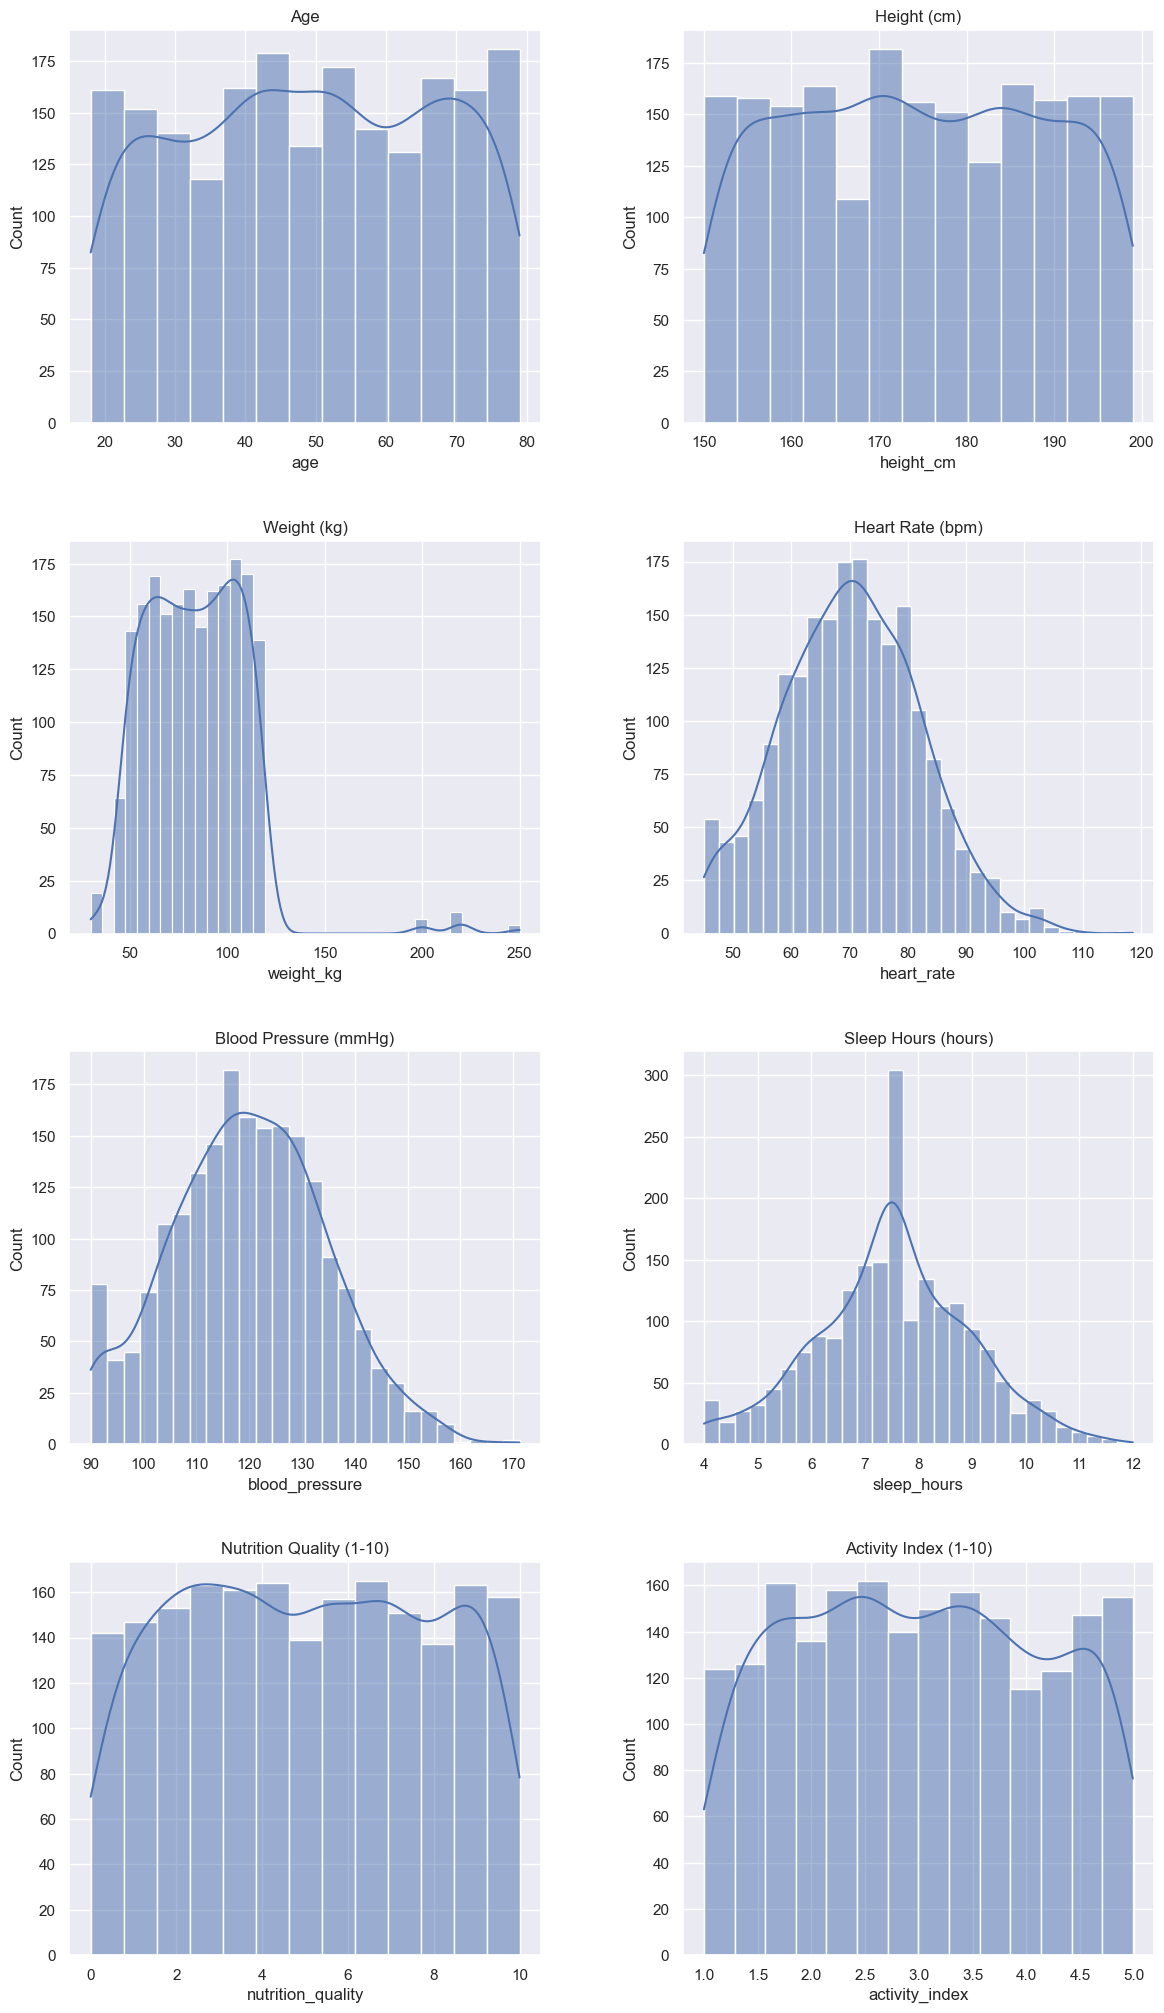

In [8]:
fig,axes = plt.subplots(4,2,figsize = (14,25))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

sns.histplot(data1['age'], ax= axes[0,0],kde = True)
axes[0,0].set_title('Age')

sns.histplot(data1['height_cm'], ax= axes[0,1],kde = True)
axes[0,1].set_title('Height (cm)')

sns.histplot(data1['weight_kg'], ax= axes[1,0],kde = True)
axes[1,0].set_title('Weight (kg)')

sns.histplot(data1['heart_rate'], ax= axes[1,1],kde = True)
axes[1,1].set_title('Heart Rate (bpm)')

sns.histplot(data1['blood_pressure'], ax= axes[2,0],kde = True)
axes[2,0].set_title('Blood Pressure (mmHg)')

sns.histplot(data1['sleep_hours'], ax= axes[2,1],kde = True)
axes[2,1].set_title('Sleep Hours (hours)')

sns.histplot(data1['nutrition_quality'], ax= axes[3,0],kde = True)
axes[3,0].set_title('Nutrition Quality (1-10)')

sns.histplot(data1['activity_index'], ax= axes[3,1],kde = True)
axes[3,1].set_title('Activity Index (1-10)')

Every data is good but weight. There's an outliers on weight data distribution which is 250kg. But in reality there's person has 250kg so we keep this data to ensure the model can account for extreme but valid cases.

## Find the correalted variable to Fitness

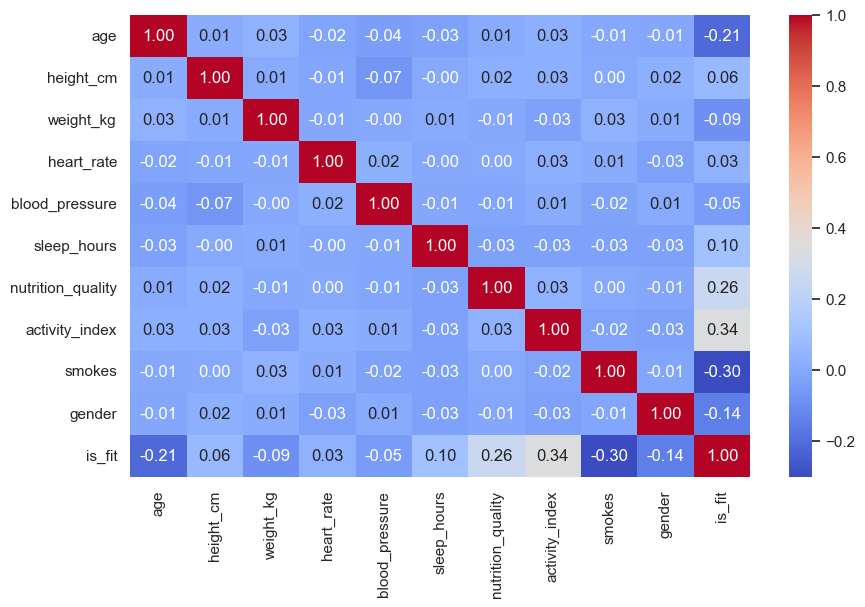

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(data1.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

We generate a correlation heatmap to observe relationships between variables. From the heatmap, we see that:

- weight and height show moderate correlation with is_fit.
- smokes has a negative correlation, indicating smokers are less likely to be fit.
- sleep_hours shows a weak positive correlation with fitness.

Although all predictors were retained for modeling, the correlation analysis showed no strong multicollinearity issues, and highlighted that activity index and smoking status are the strongest predictors of fitness.

# Processing The Data

## Declare Dependent and Independent Variable
We define the dependent variable (target) is is_fit

The independent variable (predictiors) are all the feature but is_fit

In [10]:
x1 = data1.drop('is_fit',axis=1)   #independent variable
y = data1['is_fit']   #dependent variable

## Split Train and Test Data

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( x1, y, test_size=0.2, random_state=42 )

## Build The Regression

We fit a logistic regression model to the data. The model estimates the log-odds of being fit as a linear combination of the predictors.

The regression coefficients show the influence of each variable:
- Positive coefficients increase the likelihood of being fit.
- Negative coefficients decrease the likelihood of being fit.

For example, a negative coefficient for smokes suggests that smoking reduces the chance of being fit.

In [12]:
x = sm.add_constant(x1)   #add constant to the model (intercept)
log_reg = sm.Logit(y_train, X_train)   #build the model
model_reg = log_reg.fit()   #fit the model
model_reg.summary()

Optimization terminated successfully.
         Current function value: 0.443261
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 is_fit   No. Observations:                 1600
Model:                          Logit   Df Residuals:                     1590
Method:                           MLE   Df Model:                            9
Date:                Tue, 02 Sep 2025   Pseudo R-squ.:                  0.3399
Time:                        19:03:49   Log-Likelihood:                -709.22
converged:                       True   LL-Null:                       -1074.3
Covariance Type:            nonrobust   LLR p-value:                2.172e-151
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                  -0.0392      0.004    -10.077      0.000      -0.047      -0.032
height_cm             0.0040      0.003      1.213      0.225      -0.002       0.011
weight_kg            -0.0076      0.003     -3.032      0.002      -0.013      -0.003
heart_rate           -0.0069      0.005     -1.309      0.190      -0.017       0.003
blood_pressure       -0.0238      0.004     -5.909      0.000      -0.032      -0.016
sleep_hours           0.2141      0.044      4.842      0.000       0.127       0.301
nutrition_quality     0.2843      0.025     11.204      0.000       0.235       0.334
activity_index        0.9739      0.067     14.573      0.000       0.843       1.105
smokes               -1.9866      0.148    -13.461      0.000      -2.276      -1.697
gender               -1.0293      0.136     -7.591      0.000      -1.295      -0.764
=====================================================================================
"""

## Confusion Matrix
To evaluate predictions, we create a confusion matrix:

- True Positive (TP): Correctly predicted as fit.
- True Negative (TN): Correctly predicted as not fit.
- False Positive (FP): Incorrectly predicted as fit.
- False Negative (FN): Incorrectly predicted as not fit.

This helps us understand model performance beyond accuracy alone.

Therefore, we also compute:

- Precision: Proportion of predicted fit cases that are truly fit.
- Recall: Proportion of actual fit cases that are correctly predicted.
- F1-score: Harmonic mean of precision and recall.

In [13]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

def confusion_matrix_custom(data, actual_values, model, threshold=0.5):
    # Predict probabilities
    pred_probs = model.predict(data)

    # Convert to binary labels using threshold
    pred_values = (pred_probs >= threshold).astype(int)

    # Confusion matrix (0 and 1)
    bins = np.array([0, 1, 2])
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]

    # Accuracy
    accuracy = (cm[0,0] + cm[1,1]) / cm.sum()

    # Precision, Recall, F1
    precision = precision_score(actual_values, pred_values)
    recall = recall_score(actual_values, pred_values)
    f1 = f1_score(actual_values, pred_values)

    # Print results
    print("Confusion Matrix :\n", cm.astype(int))
    print(f"Accuracy  : {accuracy:.3f}")
    print(f"Precision : {precision:.3f}")
    print(f"Recall    : {recall:.3f}")
    print(f"F1-score  : {f1:.3f}")

    return
    #return cm, accuracy, precision, recall, f1


# Testing The Model

In [14]:
cm1 = confusion_matrix_custom(X_train,y_train,model_reg)
print(cm1)

Confusion Matrix :
 [[824 142]
 [183 451]]
Accuracy  : 0.797
Precision : 0.761
Recall    : 0.711
F1-score  : 0.735
None


In [15]:
cm2 = confusion_matrix_custom(X_test,y_test,model_reg)
cm2

Confusion Matrix :
 [[196  39]
 [ 55 110]]
Accuracy  : 0.765
Precision : 0.738
Recall    : 0.667
F1-score  : 0.701


# Conclusion

The logistic regression model achieves reasonable accuracy. Smoking shows a negative effect on fitness, while higher sleep hours, appropriate weight, and height contribute positively. Although the model performs well, further improvements could be explored through feature engineering or alternative classification models.